#**MLP – Rendu Notebook**

**Réalisé par :**
 - BENSLIMANE Zahra
 - BENABID M'hamed

Chargé du cours MLP : Kevin BAILLY

Lien Exercice : [Notebook MLP](https://sites.google.com/view/bailly/teaching)


**Résumé :** L'objective de cette exercice est  d'implémenter l'algorithme de propagation et de retro-propagation d'un MLP

--> l'apprentissage des poids W se fera par batch de 450 exemples (totalité du dataset)

:) Veillez exécuter tout le notebook à la fois pour éviter les erreurs


In [185]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from sklearn import metrics

In [186]:
def generate_data_3classes(n1,n2,n3, display=True):
    X1 = np.random.randn(n1,2)*0.15 - np.array([0.2 , 0.2])
    X2 = np.random.randn(n2,2)*0.25 + np.array([0.1 , 0.5])
    X3 = np.random.randn(n3,2)*0.15 + np.array([0.6 , 0.2])
    X = np.concatenate((X1,X2,X3), axis=0)
    Y = np.concatenate([np.ones(n1), np.ones(n2)*2, np.ones(n3)*3])-1

    if display:
        plt.plot(X1[:,0], X1[:,1], '.r')
        plt.plot(X2[:,0], X2[:,1], '.g')
        plt.plot(X3[:,0], X3[:,1], '.b')
        plt.show()

    return X,Y

#Converts a class vector (integers) to binary class matrix (copy from keras)
def to_categorical(y, num_classes=None, dtype="float32"):
    y = np.array(y, dtype="int")
    input_shape = y.shape
    if input_shape and input_shape[-1] == 1 and len(input_shape) > 1:
        input_shape = tuple(input_shape[:-1])
    y = y.ravel()
    if not num_classes:
        num_classes = np.max(y) + 1
    n = y.shape[0]
    categorical = np.zeros((n, num_classes), dtype=dtype)
    categorical[np.arange(n), y] = 1
    output_shape = input_shape + (num_classes,)
    categorical = np.reshape(categorical, output_shape)
    return categorical

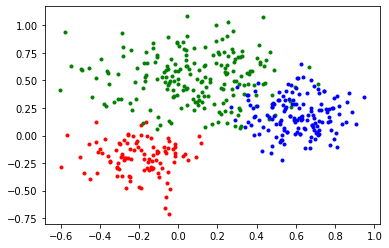

Le nombre de classes :  3
num_examples         :  450
Dimension des exemples :  2


In [187]:
X_train, Y_train = generate_data_3classes(100, 200, 150)
Y_cat = to_categorical(Y_train)

K = Y_cat.shape[1] #nombre de classes
(num_examples,D) = X_train.shape # nombre d'exemples et dimension des exemples

print("Le nombre de classes : ",K)
print("num_examples         : ", num_examples)
print("Dimension des exemples : ", D)

In [188]:
# fonction sigmoide
def sigmo(v):
    return 1/(1+np.exp(-v))

# dérivée de la fonction sigmoide
def sigmop(v):
    return np.exp(-v) / ((1+np.exp(-v))**2)

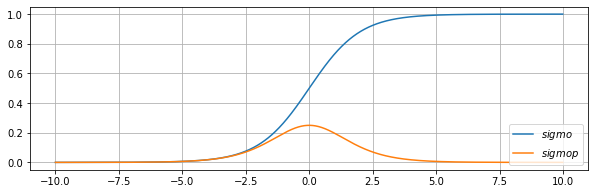

In [189]:
# Affichage de la fonction d'activation et sa dérivée
T = np.arange(-10,10,0.01)
sigm = [sigmo(t) for t in T]
derive_sigm = [sigmop(t) for t in T]

# Tracés des figures
plt.figure(figsize=(10,3)) 
plt.plot(T, sigm)
plt.plot(T, derive_sigm)
plt.grid()
plt.legend(["$sigmo$", "$sigmop$"], loc ="lower right")

In [190]:
# initialisation aléatoire des poids
W = 1 * np.random.normal(size=(D,K))   # D = 2 : Dimensions des exemples,  K =3 : Nombre de classes
b = np.zeros((1,K))

# paramètres de l'apprentissage
step_size = 1e-2
num_iter = 10000

<div class="alert alert-info">
    
### Training :
    
* L'apprentissage se fera par le batch de 450 exemples de la base d'apprentissage
* Une itération/update de la descente du gradient par epoch

</div>

In [191]:
# Apprenttissage du réseau
X = X_train
Y = Y_train
Y = tf.keras.utils.to_categorical(Y, num_classes=3)
loss_history = []

for i in range(num_iter):
    #propagation
    V = np.matmul(X,W) + b 
    Y_predict = np.vectorize(sigmo)(V)  
    epsilon = Y_predict - Y  
    loss = np.mean(epsilon**2)

    # Kepp track of our loss
    loss_history.append(loss)

    if i % 1000 == 0:   
        print('iteration {}: loss {}'.format(i, loss))

    # retro-propagation
    c = np.multiply(2*epsilon,np.vectorize(sigmop)(V) )
    dL_W = np.transpose(X)@c
    dL_b = np.sum(c, axis = 0)

    # Update W and b parameters with gradient descent 
    W += -step_size * dL_W
    b += -step_size * dL_b

iteration 0: loss 0.2631817375530704
iteration 1000: loss 0.03738243807388248
iteration 2000: loss 0.03649110922560548
iteration 3000: loss 0.036173044424349536
iteration 4000: loss 0.03600627704536497
iteration 5000: loss 0.035902500616319735
iteration 6000: loss 0.035831326419869296
iteration 7000: loss 0.03577932305935038
iteration 8000: loss 0.03573958310653132
iteration 9000: loss 0.03570817608092566


Text(0.5, 1.0, 'Loss function')

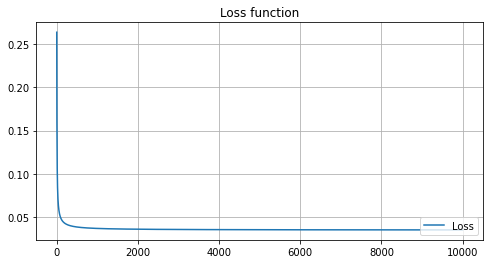

In [192]:
# Affichage de la loss
itr =  [i for i in range(num_iter)]
# Tracée de la loss
plt.figure(figsize=(8,4)) 
plt.plot(itr, loss_history)
plt.grid()
plt.legend(["Loss"], loc ="lower right")
plt.title("Loss function")

In [193]:
# calcul de la précision
Y_predict = np.vectorize(sigmo)(X@W+b)
class_pred = []
for i in range(len(X_train)):
     index = np.where(Y_predict[i] == np.amax(Y_predict[i]))[0][0]  
     class_pred.append(index)
print('Test accuracy: {:.2}'.format(np.mean(class_pred == Y_train)))

Test accuracy: 0.94


###**Pour aller plus loin** : 
- code d'évaluation des performances (et de visualisation)
- création d'un jeu de test indépendant (performance en généralisation)
- ajouter une couche cachée (observer les gains en performance et les frontières de décision)


###**Evaluation des performances**

In [194]:
def draw_cf_Matrix(cf_matrix_3x3,cmap):
  flatten_cf_matrix = cf_matrix_3x3.flatten()
  group_counts = ["{0:0.0f}".format(value) for value in np.array(cf_matrix_3x3).flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in flatten_cf_matrix / np.sum(flatten_cf_matrix)]

  labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(3,3)

  ax = sns.heatmap(cf_matrix_3x3, annot=labels, fmt='', cmap=cmap)

  ax.set_title('Multiclass Confusion Matrix\n\n');
  ax.set_xlabel('\nPredicted  Category')
  ax.set_ylabel('Actual  Category ');

  ## Ticket labels - List must be in alphabetical order
  ax.xaxis.set_ticklabels(['red','green', 'blue'])
  ax.yaxis.set_ticklabels(['red','green', 'blue'])

  ## Display the visualization of the Confusion Matrix.
  plt.show()


cf_matrix_3x3 = 
 [[ 99   1   0]
 [  1 184  15]
 [  0   8 142]]


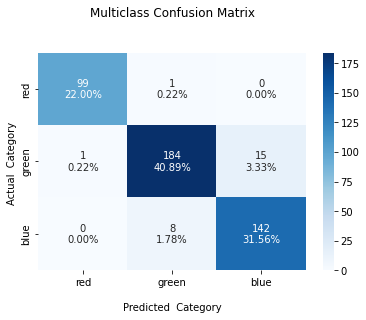

In [195]:
# Computing the confusion matrix
cf_matrix_3x3 = metrics.confusion_matrix(Y_train,class_pred,labels=[0, 1, 2])
print("cf_matrix_3x3 = \n",cf_matrix_3x3)

# Display of the confusion matrix
draw_cf_Matrix(cf_matrix_3x3,'Blues')

**Création d'un jeu de test indépendant**

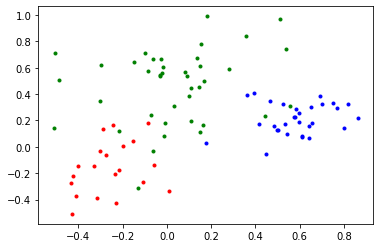

In [196]:
X_test, Y_test = generate_data_3classes(20, 40, 30)   
Y_cat_test = to_categorical(Y_test) 


In [197]:
Y_pred_test = np.vectorize(sigmo)(X_test@W+b)
class_pred_test = []
for i in range(len(X_test)):
     index = np.where(Y_pred_test[i] == np.amax(Y_pred_test[i]))[0][0]
     class_pred_test.append(index)
print('Training accuracy: {:.2}'.format(np.mean(class_pred_test == Y_test)))

Training accuracy: 0.89


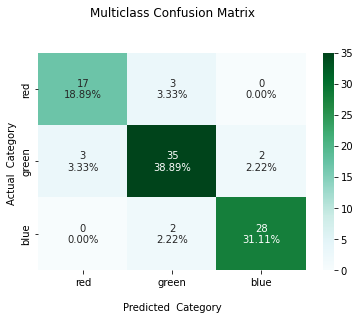

In [198]:
# Computing the confusion matrix
cf_matrix_3x3 = metrics.confusion_matrix(Y_test,class_pred_test,labels=[0, 1, 2])
#print("cf_matrix_3x3 = \n",cf_matrix_3x3)

draw_cf_Matrix(cf_matrix_3x3,"BuGn")